# In Depth: Principal Component Analysis
Up until now, we have been looking in depth at supervised learning estimators: those
estimators that predict labels based on labeled training data. Here we begin looking at
several unsupervised estimators, which can highlight interesting aspects of the data
without reference to any known labels.

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a
dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. After
a brief conceptual discussion of the PCA algorithm, we will see a couple examples of
these further applications. We begin with the standard imports:

## Introducing Principal Component Analysis
Principal component analysis is a fast and flexible unsupervised method for dimen‐
sionality reduction in data, which we saw briefly in “Introducing Scikit-Learn” Its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider the following 200 points

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
rng=np.random.RandomState(1)
X=np.dot(rng.rand(2,2),rng.rand(2,200)).T
X

array([[3.42132545e-01, 1.17928821e-01],
       [3.88578207e-01, 1.46941370e-01],
       [5.12974249e-01, 1.82724046e-01],
       [5.39959255e-01, 1.66185760e-01],
       [8.32611935e-01, 2.80060194e-01],
       [8.86484631e-01, 2.77824670e-01],
       [4.59251913e-01, 1.19431705e-01],
       [9.79613203e-01, 2.91304010e-01],
       [2.10565615e-01, 5.26158484e-02],
       [4.57192541e-01, 3.82939631e-02],
       [1.08722055e-01, 4.08419618e-02],
       [6.43840549e-01, 1.52954828e-01],
       [1.89530130e-01, 6.55537891e-03],
       [9.15832114e-01, 2.86666173e-01],
       [6.54335975e-01, 2.50080005e-01],
       [9.34312198e-02, 4.56338491e-03],
       [4.60846584e-01, 5.33614522e-02],
       [6.42979909e-01, 1.00504379e-01],
       [2.25065015e-01, 3.96404609e-02],
       [8.71809738e-01, 2.44814588e-01],
       [6.13795816e-01, 1.04325356e-01],
       [1.05025311e+00, 2.84327434e-01],
       [4.54704377e-01, 1.75971571e-01],
       [6.49330908e-01, 2.65704002e-01],
       [6.793059

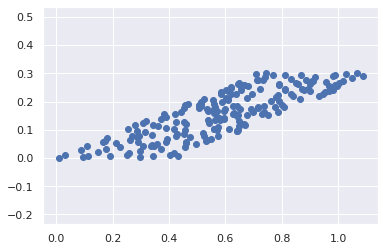

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

**By eye, it is clear that there is a nearly linear relationship between the x and y vari‐
ables. This is reminiscent of the linear regression data we explored in “In Depth: Lin‐
ear Regression”, but the problem setting here is slightly different: rather
than attempting to predict the y values from the x values, the unsupervised learning
problem attempts to learn about the relationship between the x and y values**

_In principal component analysis, one quantifies this relationship by finding a list of
the principal axes in the data, and using those axes to describe the dataset. Using
Scikit-Learn’s PCA estimator, we can compute this as follows:_

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [14]:
# the fit leearns some quantities from the data, most importantly the "Components" and "Explaned Variance"
print(pca.components_)

[[-0.9534372  -0.30159162]
 [ 0.30159162 -0.9534372 ]]


In [15]:
print(pca.explained_variance_)

[0.06022031 0.00197053]


To see what these numbers mean, let’s visualize them as vectors over the input data,
using the “components” to define the direction of the vector, and the “explained var‐
iance” to define the squared-length of the vector

(-0.0455830817980441,
 1.141297509149081,
 -0.014895066196102034,
 0.3155191169807142)

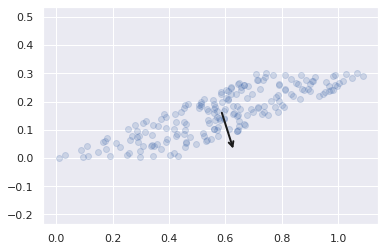

In [17]:
def draw_vector(v0,v1,ax=None):
    ax=ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    color='k',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)
    
    
# plot the data
plt.scatter(X[:,0],X[:,1],alpha=0.2)
for lenght, vector in zip(pca.explained_variance_, pca.components_):
    v=vector*3*np.sqrt(lenght)
    draw_vector(pca.mean_,pca.mean_+v)
    
plt.axis('equal')

These vectors represent the principal axes of the data, and the length is an indication of how “important” that axis is in describing the distribu‐
tion of the data—more precisely, it is a measure of the variance of the data when pro‐
jected onto that axis. The projection of each data point onto the principal axes are the
“principal components” of the data.

This transformation from data axes to principal axes is as an affine transformation,
which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical
curiosity, it turns out to have very far-reaching applications in the world of machine
learning and data exploration.

## PCA as dimensionality reduction
Using PCA for dimensionality reduction involves zeroing out one or more of the
smallest principal components, resulting in a lower-dimensional projection of the
data that preserves the maximal data variance.  
___Here is an example of using PCA as a dimensionality reduction transform:___

In [18]:
pca=PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)
print(f"Original Shape of X: {X.shape}")
print(f"Transformed Shape of X: {X_pca.shape}")


Original Shape of X: (200, 2)
Transformed Shape of X: (200, 1)


The transformed data has been reduced to a single dimension. To understand the
effect of this dimensionality reduction, we can perform the inverse transform of this
reduced data and plot it along with the original data

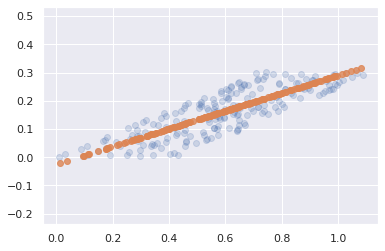

In [20]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along
the least important principal axis or axes is removed, leaving only the component(s)
of the data with the highest variance. The fraction of variance that is cut out (propor‐
tional to the spread of points about the line formed in Figure is roughly a meas‐
ure of how much “information” is discarded in this reduction of dimensionality.  
This reduced-dimension dataset is in some senses “good enough” to encode the most
important relationships between the points: despite reducing the dimension of the
data by 50%, the overall relationship between the data points is mostly preserved.

## PCA for visualization: Handwritten digits
The usefulness of the dimensionality reduction may not be entirely apparent in only
two dimensions, but becomes much more clear when we look at high-dimensional
data. To see this, let’s take a quick look at the application of PCA to the digits data we
saw in Decsion Tree and Random Forests.


In [21]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

**Recall that the data consists of 8×8 pixel images, meaning that they are 64-
dimensional. To gain some intuition into the relationships between these points, we
can use PCA to project them to a more manageable number of dimensions, say two:**

In [22]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


/tmp/ipykernel_60652/275281823.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


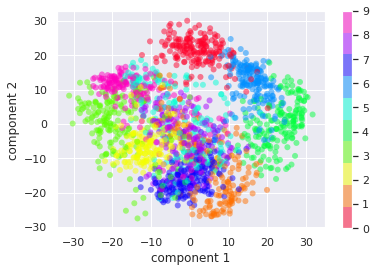

In [24]:
# lets plot the first two principal components of each point to learn about the data
plt.scatter(projected[:,0],projected[:,1],
           c=digits.target,edgecolor='none',alpha=0.5,
           cmap=plt.cm.get_cmap('gist_rainbow',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud,
and these points are the projection of each data point along the directions with the
largest variance. Essentially, we have found the optimal stretch and rotation in 64-
dimensional space that allows us to see the layout of the digits in two dimensions, and
have done this in an unsupervised manner—that is, without reference to the labels.

### Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components
are needed to describe the data. We can determine this by looking at the cumulative
explained variance ratio as a function of the number of components

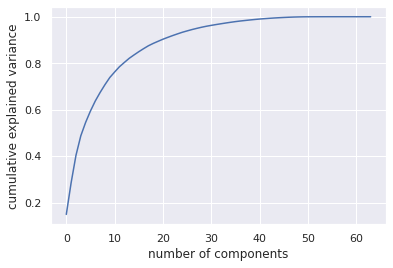

In [26]:
pca= PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");

This curve quantifies how much of the total, 64-dimensional variance is contained
within the first N components. For example, we see that with the digits the first 10
components contain approximately 75% of the variance, while you need around 50
components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as meas‐
ured by the explained variance) and that we’d need about 20 components to retain
90% of the variance. Looking at this plot for a high-dimensional dataset can help you
understand the level of redundancy present in multiple observations.

## PCA as Noise Filtering
PCA can also be used as a filtering approach for noisy data. The idea is this: any com‐
ponents with variance much larger than the effect of the noise should be relatively
unaffected by the noise. So if you reconstruct the data using just the largest subset of
principal components, you should be preferentially keeping the signal and throwing
out the noise.

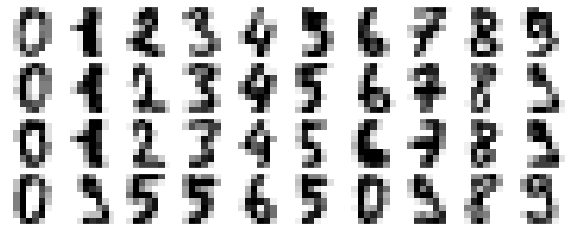

In [33]:
def plot_digits(data):
    fig,axes = plt.subplots(4,10,figsize=(10,4),
                         subplot_kw={'xticks':[],'yticks':[]},
                         gridspec_kw=dict(hspace=0.1,wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary', interpolation='nearest',
                 clim=(0,16))
        
plot_digits(digits.data)

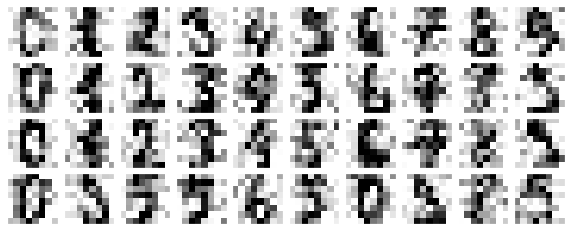

In [36]:
# Now let’s add some random noise to create a noisy dataset, and replot it
np.random.seed(42)
nosiy = np.random.normal(digits.data,4)
plot_digits(nosiy)

**It’s clear by eye that the images are noisy, and contain spurious pixels. Let’s train a
PCA on the noisy data, requesting that the projection preserve 50% of the variance:**

In [38]:
pca = PCA(0.50).fit(nosiy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components. Now we compute
these components, and then use the inverse of the transform to reconstruct the fil‐
tered digits

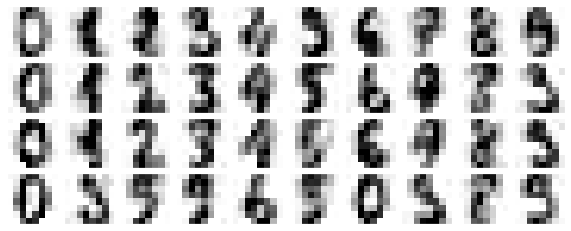

In [39]:
components = pca.transform(nosiy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

**This signal preserving/noise filtering property makes PCA a very useful feature selec‐
tion routine—for example, rather than training a classifier on very high-dimensional
data, you might instead train the classifier on the lower-dimensional representation,
which will automatically serve to filter out random noise in the inputs.**

# Example: Eigenfaces
Earlier we explored an example of using a PCA projection as a feature selector for
facial recognition with a support vector machine.

In [40]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi']
(820, 62, 47)


Let’s take a look at the principal axes that span this dataset. Because this is a large
dataset, we will use RandomizedPCA—it contains a randomized method to approximate the first N principal components much more quickly than the standard PCA esti‐
mator, and thus is very useful for high-dimensional data (here, a dimensionality of
nearly 3,000). We will take a look at the first 150 components:

In [41]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

___In this case, it can be interesting to visualize the images associated with the first sev‐
eral principal components (these components are technically known as “eigenvec‐
tors,” so these types of images are often called “eigenfaces”). As you can see in
Figure they are as creepy as they sound:___

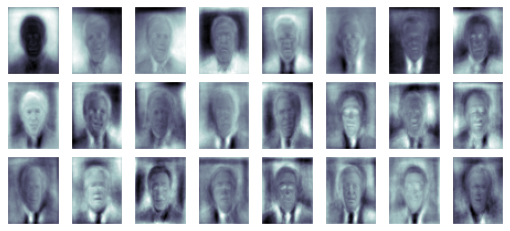

In [43]:
fig, axes = plt.subplots(3,8, figsize=(9,4),
                      subplot_kw={'xticks':[],'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47),cmap='bone')

The results are very interesting, and give us insight into how the images vary: for
example, the first few eigenfaces (from the top left) seem to be associated with the
angle of lighting on the face, and later principal vectors seem to be picking out certain
features, such as eyes, noses, and lips. Let’s take a look at the cumulative variance of
these components to see how much of the data information the projection is preserv‐
ing

Text(0, 0.5, 'cumulative explained variance')

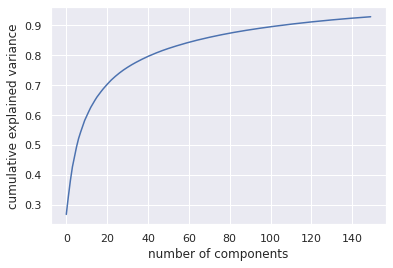

In [45]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

We see that these 150 components account for just over 90% of the variance. That
would lead us to believe that using these 150 components, we would recover most of
the essential characteristics of the data. To make this more concrete, we can compare
the input images with the images reconstructed from these 150 components

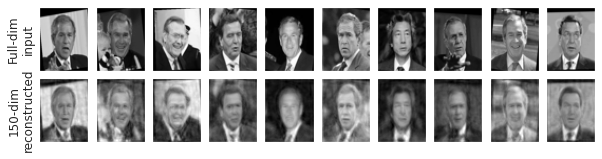

In [47]:
# compute the components and projectd faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# plot the results
fig, ax = plt.subplots(2,10, figsize=(10,2.5),
                      subplot_kw={'xticks':[],'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')
    ax[1,i].imshow(projected[i].reshape(62,47),cmap='binary_r')
    
ax[0,0].set_ylabel("Full-dim\ninput")
ax[1,0].set_ylabel("150-dim\nreconstructed");

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features.  
although it reduces the dimensionality of
the data by nearly a factor of 20, the projected images contain enough information
that we might, by eye, recognize the individuals in the image. What this means is that
our classification algorithm needs to be trained on 150-dimensional data rather than
3,000-dimensional data, which depending on the particular algorithm we choose, can
lead to a much more efficient classification

# Principal Component Analysis Summary
In this section we have discussed the use of principal component analysis for dimen‐
sionality reduction, for visualization of high-dimensional data, for noise filtering, and
for feature selection within high-dimensional data. Because of the versatility and
interpretability of PCA, it has been shown to be effective in a wide variety of contexts
and disciplines. Given any high-dimensional dataset, I tend to start with PCA in
order to visualize the relationship between points (as we did with the digits), to
understand the main variance in the data (as we did with the eigenfaces), and to
understand the intrinsic dimensionality (by plotting the explained variance ratio).
Certainly PCA is not useful for every high-dimensional dataset, but it offers a
straightforward and efficient path to gaining insight into high-dimensional data.
PCA’s main weakness is that it tends to be highly affected by outliers in the data. For
this reason, many robust variants of PCA have been developed, many of which act to
iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA
and SparsePCA, both also in the sklearn.decomposition submodule. Randomi
zedPCA, which we saw earlier, uses a nondeterministic method to quickly approxi‐
mate the first few principal components in very high-dimensional data, while
SparsePCA introduces a regularization term (see “In Depth: Linear Regression” on
page 390) that serves to enforce sparsity of the components.
In the following sections, we will look at other unsupervised learning methods that
build on some of the ideas of PCA.